# Correlating Factors of House Sale Prices

**Sanabu Washizuka**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This project is an analysis of what factors of a house's build and features are correlated with its sale price and an exploration of which factors will build a prediction model of the highest accuracy  to predict these values. The data underwent a cleaning process, removing invalid data and converting data accordingly to prepare input into a regression model. A multiple linear regression was used for the regression model and was fit with the 10 features most correlated with the sale price. This was compared against two other feature sets, one with features pertaining to square foot area measures, and the other a set of counts of different rooms to the house. The model of top 10 correlated features was found to have the strongest $R^2$ among the three, and the final model yielded an $R^2$ of 0.774 on a separate test dataset, indicating a reliable prediction model.

[Back to top](#Index)


## 1. Introduction

#### Problem-Solving Framework Overview
The problem to solve was developing a method to predict a house's sale price depending on its features. The general approach is to find features that are most correlated with the sale price through statistical functions available in Python, and fitting the data of those features into a prediction model.

#### Workflow Model
- Data Exploration
- Data Preparation
- Correlation Calculations
- Prediction Model Creation
- Model Performance Analysis
- Test Verification

The data will first be loaded into a pandas data frame for convenient exploration and manipulation. The data will first be explored, getting an idea of data types and the size of the data, with a few correlations reviewed visually. Data preparation will then take place, ensuring ineffective and misrepresentative data is removed or changed to maximize data integrity.

Once the data is cleaned, correlations will be calculated for each feature, and the top 10 correlated features will be fit into a model. Another two sets of features, arbitrarily chosen based on contextual similarity will also have models fit to them for comparison. Out of these, the best performing model, the one with the highest $R^2$, will be chosen to be verified.

The verification will consist of testing the model's prediction capability against a data set unfamiliar to the model. The $R^2$ of this analysis will be the indicator of this model's performance.

#### Data Science Processes
The data science problems in this analysis is the decision of what features to use to fit the prediction model on to and how to ensure clean data. One measure of possible prediction ability is the correlation of these features with `SalePrice`(the value to predict), represented by their correlation coefficient with `SalePrice`. This will serve as the main marker for candidacy of which features to use in the model.

Visual analysis through the use of error histograms and correlation scatterplots will also be utilized as secondary indicators of model performance.


[Back to top](#Index)

## 2. The Data

[Back to top](#Index)

### 2.1 Import the Data

The data was imported, explored and cleaned as a `pandas data frame`, utilizing several pandas functions for convenient manipulation and analysis of the data. Libraries used include the aforementioned `pandas`, `numpy` for numerical manipulation, `matplotlib` and `scipy.stats` for graph plotting, and `sklearn` for the linear regression model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.stats import linregress

In [2]:
# Import source data to a pandas dataframe
house_data = pd.read_csv("houseSmallData.csv")

[Back to top](#Index)

### 2.2 Data Exploration

Viewing the data frame itself and the use of the `shape()` method provided a quick overview of the contents of the data as well as its shape of 100 records and 82 columns. One of these columns, `Unnamed: 0`, was an artifact of importing the data and marked to be dropped in the data preparation stage.

A quick clean was performed by dropping duplicate records using `drop_duplicates` and the data was checked to see what percentage of the values in `SalePrice` (the house sale prices) were either `NaN` or `"0" values`. This process used the `isnull()` method and filtering with the `loc` attribute, yielding no results for either. At this point, the `SalePrice` data was ready to be reviewed, and a quick description of its data was produced with the `describe()` method, **yielding a mean of 173,820.66 and a standard deviation of 72,236.55**.

In [3]:
# View raw data as dataframe
house_data

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
1,66,67,20,RL,NaN,19900,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2010,WD,Normal,180000
2,41,42,20,RL,115.0,16905,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,170000
3,28,29,20,RL,47.0,16321,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,207500
4,85,86,60,RL,121.0,16059,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
96,23,24,120,RM,44.0,4224,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,129900
97,87,88,160,FV,40.0,3951,Pave,Pave,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,164500
98,56,57,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,172500


In [4]:
# Drop any duplicate rows
house_data.drop_duplicates(inplace=True)
house_data.shape

# No duplicate rows existed
# Data consists of 100 rows and 82 features

(100, 82)

In [5]:
# Check for null or 0 values within the dependent variable SalePrice
sale_price = house_data["SalePrice"]
sale_count = sale_price.count()

sale_price_null = sale_price.isnull().sum() / sale_count
sale_price_zero = sale_price.loc[sale_price==0].count() / sale_count

print(f'{sale_price_null} % of values from {sale_price.name} are NaN.')
print(f'{sale_price_zero} % of values from {sale_price.name} are 0.')

0.0 % of values from SalePrice are NaN.
0.0 % of values from SalePrice are 0.


In [6]:
# Describe depend variable data
sale_price.describe()

count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64

A quick visual analysis was made to preemptively examine potentially correlated features of numerical values, using correlation scatterplots. A list of numerical features was produced with `select_dtypes`, out of which, 6 were subjectively chosen as probable features to hold high correlation with `SalePrice`. The features selected were the following:
- LotArea
- OverallQual
- OverallCond
- YearBuilt
- TotRmsAbvGrd
- MoSold

In [7]:
# List numerical features for quick correlation review
# CAUTION: Some of these may be categorical features in the form of a number (e.g. MSSubClass)
house_data_num = house_data.select_dtypes(include = [np.number])
house_data_num.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [8]:
# View correlation of 6 numerical value columns:
scatter_list = ["LotArea", "OverallQual", "OverallCond", "YearBuilt", "TotRmsAbvGrd", "MoSold"]

Before plotting the correlation charts, the distribution of SalePrice was checked to see if the shape of the data would distort the scatter plots. This was done by plotting the data on a histogram and reviewing the skew of the data using the pandas method `skew()`. The result was a visually skewed distribution to the left of the median of the data(`Fig. 2.2.1`), with a skew of 1.18. A data of a skew of 0 is most desireable and will not distort the plots and to account for this, the log values of the sale prices were taken to plot the correlations. The resulting distribution was centralized to the median(`Fig. 2.2.2`) and a skew of -0.09.

Skew: 1.1783462304851948


Text(0.83, 0.03, 'Fig 2.2.1')

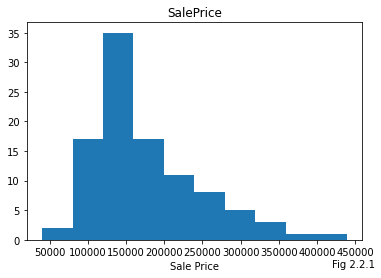

In [9]:
# Review shape of SalePrice distribution
print(f'Skew: {sale_price.skew()}')
plt.hist(sale_price)
plt.title("SalePrice")
plt.xlabel("Sale Price")
plt.figtext(.83,.03,"Fig 2.2.1")


Skew: -0.0963224020775556


Text(0.83, 0.03, 'Fig 2.2.2')

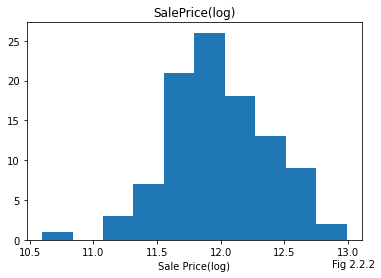

In [10]:
# Convert the values of SalePrice to log values to
#   fit distribution to normal distribution. This is done
#   in order to even out the vertical distribution of the scatter plot
sale_price_log = np.log(sale_price)
print(f'Skew: {sale_price_log.skew()}')
plt.hist(sale_price_log)
plt.title("SalePrice(log)")
plt.xlabel("Sale Price(log)")
plt.figtext(.83,.03,"Fig 2.2.2")

The log values of the sales price were then plotted against each of the 6 dependent variable features chosen above. A function and for loop was used for this process to make for cleaner and modular code.

In [11]:
# Function for plotting scatter plot correlations
# Requires exactly 6 features in x_features

fig_count = 1

def corr_plotter(x_features, y_feature, data):
    # Initialize axes counters for figure position
    x_count = 0
    y_count = 0
    global fig_count

    # Size of the figure will be 2x3 subplots
    fig, axs = plt.subplots(2, 3)
    fig.tight_layout(pad = 2)
    fig.set_figheight(8)
    fig.set_figwidth(14)

    # Add x values and create individual subplots on a single figure
    for val in x_features:
        # Get the series for each column
        x = data[val]
        y = y_feature
        # Find regression line equation using scipy.stats
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
        line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
        regress_values = x * slope + intercept
        # Generate subplot and annotations
        axs[x_count, y_count].scatter(x, y)
        axs[x_count, y_count].set_title(val)
        axs[x_count, y_count].set_xlabel("Feature Value")
        axs[x_count, y_count].set_ylabel("Sale Price(log)")
        # Plot regression line
        axs[x_count, y_count].plot(x,regress_values,"black")
        # Display regression line equation
        axs[x_count, y_count].annotate(
            line_eq,(10, 10),
            xycoords= "axes pixels",
            fontsize=12,
            color="black"
            )
        # Flow control for axes counters to account for max width of figure
        x_count += 1
        if x_count == 2:
            x_count = 0
            y_count += 1
    plt.figtext(.93,.03,f'Fig 2.2.3.{fig_count}')
    plt.show()
    fig_count += 1
    return

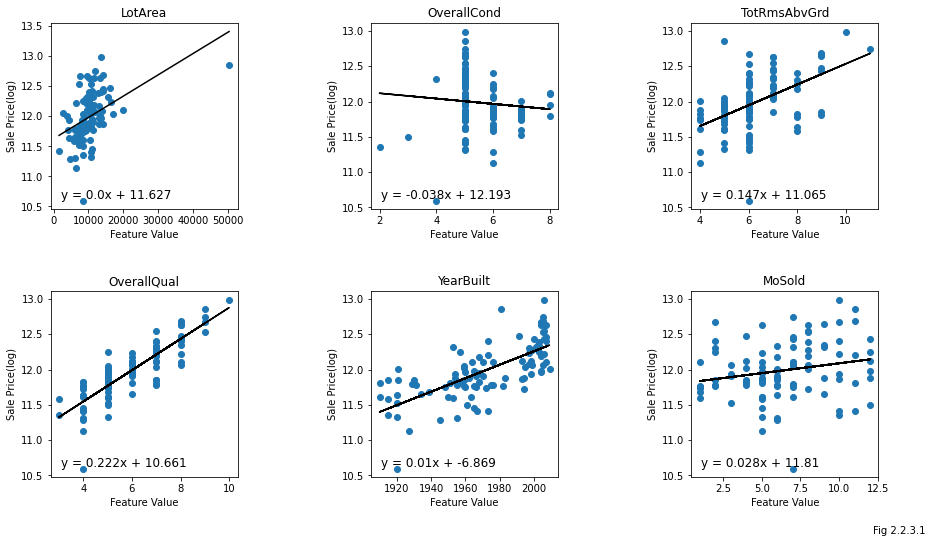

In [12]:
# Plot scatterplot correlations with log-adjusted sales data
corr_plotter(scatter_list, sale_price_log, house_data)

**Correlation Summary:**<br>
Strong correlation: `OverallQual`<br>
Moderate correlation: `TotRmsAbvGrd`, `LotArea`, `YearBuilt`<br>
Poor correlation: `OverallCond`, `MoSold`<br>

Though not a concrete measure, strong correlations can be found in the scatterplots above where the data points are plotted close to the regression line. These scatterplots can also be effective when used to compare relative correlation between features. One of the best correlated features seems to be `OverallQual`, indicated by a consistently tight surrounding of poits along the regression line, as opposed to `MoSold` which has possibly the worst correlation due to the wide spread of its data points.


**Individual plot observations:**
- `LotArea`: Appears to be correlated, however it is difficult to tell with the outlier in the upper right extremity of the graph.
- `OverallCond`: Several data points appear at rating 5 and seem to taper to a point as the rating gets higher, implying this feature may not be correlated with the sale price.
- `TotlRmsAbvGrd`: Though there is significant variance, there seems to be a positive correlation with the sales price.
- `OverallQual`: A tight correlation seems to exist for this feature, making it a strong candidate to be a feature to test on.
- `YearBuilt`: A moderate and positive correlation seems to exist for this feature.
- `MoSold`: As many data points are dispersed in an oblong shape across the graph, a poor correlation seems to exist for this feature.

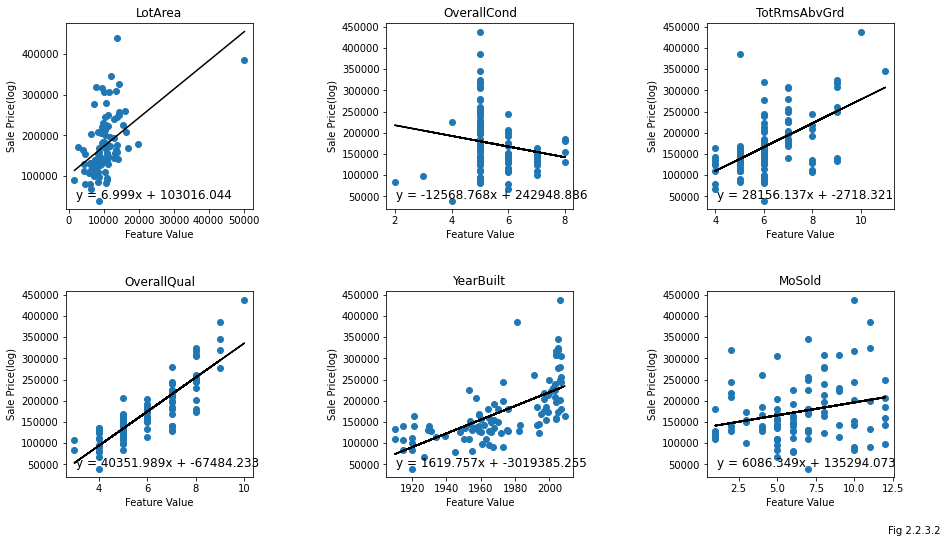

In [13]:
# Compare scatterplot correlations with sales data not adjusted to log values
corr_plotter(scatter_list, sale_price, house_data)

[Back to top](#Index)

### 2.3 Data Preparation

With a general idea of the characteristics of the data, the process moved to the data cleaning step. The cleaning began with the removal of the data frame columns that did not contextually have anything to do with the sales price, `Id` and `Unnnamed: 0`.

Next, columns with more than 40% of its values as NaN values were found with the `isnull()` method and dropped. Any remaining columns with NaN were then evaluated if those values should be interpolated. `LotFrontage` and `GarageYrBlt` both contextually do not make sense if they do not have a value (houses are assumed to have a sidewalk in front of them and a garage must have been built at some point in time), and were given average values of the entire column. All features with any NaN values and '0' values were confirmed that any NaN or 0 values make sense conceptually within their context.

In order to prepare for the proper processing of categorical data, a check of each numerical column in the data frame was then made to ensure the context of the feature appropriately represented a measurement and not a categorical label. This was done by manually referencing `data_description.txt` all features listed as numericals in the data frame. One feature that was of a numerical type in the data frame was in fact a categorical feature, and changed appropriately with the `astype()` method.

Once all categorical features were of the correct data type, one-hot encoding was applied using the `get_dummies()` method, resulting in the final cleaned data frame, `train_data_one_hot`.

In [14]:
# Drop any columns that function as labels (e.g. id's addresses)
# After manual review of the data, "Id" and "Unnamed: 0" contextually
#   do not contribute to the sale price
train_data = house_data.drop("Id", axis=1)
train_data.drop("Unnamed: 0", inplace=True, axis=1)
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
1,20,RL,NaN,19900,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2010,WD,Normal,180000
2,20,RL,115.0,16905,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,170000
3,20,RL,47.0,16321,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,207500
4,60,RL,121.0,16059,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
96,120,RM,44.0,4224,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,129900
97,160,FV,40.0,3951,Pave,Pave,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,164500
98,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,172500


In [15]:
# Drop any columns with more than 40% NaN values

# Find all columns with more than 40% NaN values
nulls = house_data.isnull().sum().sort_values(ascending=False)
# Get the percentages of each column
nulls_pcnt = nulls/house_data.count().max()
null_drop_cols = nulls_pcnt.loc[nulls_pcnt > .4]
null_drop_cols


PoolQC         1.00
Alley          0.94
MiscFeature    0.91
Fence          0.77
FireplaceQu    0.54
dtype: float64

In [16]:
# Drop all columns found above
train_data.drop(list(null_drop_cols.index), inplace=True, axis=1)
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,68.0,50271,Pave,IR1,Low,AllPub,Inside,Gtl,...,0,0,0,0,0,11,2006,WD,Normal,385000
1,20,RL,NaN,19900,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2010,WD,Normal,180000
2,20,RL,115.0,16905,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2007,WD,Normal,170000
3,20,RL,47.0,16321,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,12,2006,WD,Normal,207500
4,60,RL,121.0,16059,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2006,WD,Normal,260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,102,0,0,0,0,6,2009,New,Partial,113000
96,120,RM,44.0,4224,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2007,WD,Normal,129900
97,160,FV,40.0,3951,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,6,2009,New,Partial,164500
98,160,FV,24.0,2645,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2009,WD,Abnorml,172500


In [17]:
#  Which columns with NaNs should be interpolated?
    # Which columns are numerical, have <= 40% and > 0% NaNs
nulls_num = train_data.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False)
nulls_num_pcnt = nulls_num/train_data.count().max()
pd.DataFrame(nulls_num_pcnt.loc[(nulls_num_pcnt > 0)])

,0
LotFrontage,0.14
GarageYrBlt,0.06


**Do any features above not make sense if they have an NaN value?**

**LotFrontage:**
With the assumption that there must be some distance between the property and the street, this feature must have a value.

**GarageYrBlt:**
Garages must have been built in some point at some point in time, this feature must have a value.


In [18]:
# Create a data frame of only the interpolate the values above
train_data_interpolated = train_data[["LotFrontage", "GarageYrBlt"]].interpolate()
train_data_interpolated

,LotFrontage,GarageYrBlt
0,68.0,1981.0
1,91.5,1970.0
2,115.0,1959.0
3,47.0,1957.0
4,121.0,1991.0
...,...,...
95,33.0,1987.0
96,44.0,1976.0
97,40.0,2009.0
98,24.0,1999.0


In [19]:
# Replace the corresponding columns with interpolated values
train_data["LotFrontage"] = train_data_interpolated["LotFrontage"]
train_data["GarageYrBlt"] = train_data_interpolated["GarageYrBlt"]
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,68.0,50271,Pave,IR1,Low,AllPub,Inside,Gtl,...,0,0,0,0,0,11,2006,WD,Normal,385000
1,20,RL,91.5,19900,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2010,WD,Normal,180000
2,20,RL,115.0,16905,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2007,WD,Normal,170000
3,20,RL,47.0,16321,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,12,2006,WD,Normal,207500
4,60,RL,121.0,16059,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2006,WD,Normal,260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,102,0,0,0,0,6,2009,New,Partial,113000
96,120,RM,44.0,4224,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2007,WD,Normal,129900
97,160,FV,40.0,3951,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,6,2009,New,Partial,164500
98,160,FV,24.0,2645,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2009,WD,Abnorml,172500


In [20]:
# Check remaining NaN values and shape of data
print(f'Remaining NaN values: {sum(train_data.isnull().sum() != 0)}')
print(f'Shape: {train_data.shape}')

Remaining NaN values: 9
Shape: (100, 75)


In [21]:
# Confirm that the only remaining NaN values are in non-numerical columns
nulls = train_data.isnull().sum().sort_values(ascending=False)
nulls_pcnt = nulls/train_data.count().max()
train_data[nulls_pcnt.loc[nulls_pcnt > 0].index].dtypes


GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
BsmtFinType1    object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType2    object
dtype: object

**Do any features above not make sense if they have an NaN value?**<br>
No, an NaN value would make sense contextually for all the features above.

In [22]:
# Which numericals are actually categories?
num_cols = train_data.select_dtypes(include=[np.number])
list(num_cols.columns)
# Manually review the output list with data_description.txt

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [23]:
# MSSubClass is a category, but is presented as numerical data. Change the dtype of this column to strings
train_data = train_data.astype({"MSSubClass": str})
train_data["MSSubClass"].dtype

dtype('O')

In [24]:
# Get all categorical columns(i.e. non-numeric columns) to one-hot encode
not_num_cols = list(train_data.select_dtypes(exclude=[np.number]))
# Execute one-hot encoding
train_data_one_hot = pd.get_dummies(data=train_data, columns=not_num_cols)
train_data_one_hot

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_ConLD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial
0,68.0,50271,9,5,1981,1987,0,1810,0,32,...,0,1,0,0,0,1,0,0,1,0
1,91.5,19900,7,5,1970,1989,287,912,0,1035,...,0,1,0,0,0,1,0,0,1,0
2,115.0,16905,5,6,1959,1959,0,967,0,383,...,1,0,0,0,0,1,0,0,1,0
3,47.0,16321,5,6,1957,1997,0,1277,0,207,...,0,1,0,0,0,1,0,0,1,0
4,121.0,16059,8,5,1991,1992,284,0,0,1288,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,33.0,4456,4,5,1920,2008,0,0,0,736,...,0,0,0,0,1,0,0,0,0,1
96,44.0,4224,5,7,1976,1976,0,840,0,200,...,0,1,0,0,0,1,0,0,1,0
97,40.0,3951,6,5,2009,2009,76,0,0,612,...,0,1,0,0,1,0,0,0,0,1
98,24.0,2645,8,5,1999,2000,456,649,0,321,...,0,1,0,0,0,1,1,0,0,0


The data frame above will be the final data set to review correlations.

[Back to top](#Index)

### 2.4 Correlation

A list of features with the 10 highest correlation coefficients was found using the `corr()` method, producing the results below. Correlation coefficients describe the relationship between variables and how closely related their change is to each other. This value can act as an indicator of a good predictor of dependent variable values.

In [25]:
# Find the features with the 10 highest correlation coefficients to SalePrice
corr = train_data_one_hot.corr()
candidates = corr["SalePrice"].sort_values(ascending=False)[0:11]
round(candidates, 3)

SalePrice      1.000
OverallQual    0.855
GrLivArea      0.735
GarageArea     0.688
BsmtQual_Ex    0.680
GarageCars     0.663
YearBuilt      0.659
TotalBsmtSF    0.616
GarageYrBlt    0.589
FullBath       0.580
MasVnrArea     0.572
Name: SalePrice, dtype: float64

The correlations in this list range from strong with the highest being `OverallQual` with 0.855, to `MasVnrArea` as the lowest with 0.572.

| Feature | Correlation<br>Coefficient|
| --- | --- |
|OverallQual    |0.855|
|GrLivArea      |0.735|
|GarageArea     |0.688|
|BsmtQual_Ex    |0.680|
|GarageCars     |0.663|
|YearBuilt      |0.659|
|TotalBsmtSF    |0.616|
|GarageYrBlt    |0.589|
|FullBath       |0.580|
|MasVnrArea     |0.572|

The list above reflects the previous visual assessment of the scatter plots, with features deemed to have a good correlation, `OverallQual` and `YearBuilt` included in this list. The other 4 features, most of which were assessed to have poor correlation, are not present on this list.

One note of interest is the inclusion of a categorical feature, `BsmtQual_Ex`. The existence of a basement with "Excellent" height has a correlation of 0.68, a value relatively stronger than most of the other features.

Another unexpected outcome was the relatively large number of features related to a house's garage included in this list. Out of 10 features, 3 are related to garages(`GarageArea`, `GarageCars`, `GarageYrBlt`)

A new set of variables will be chosen as the primary study for the regression model, comprised of this list of features with the top 10 highest correlations.


[Back to top](#Index)

## 3. Project Description

The variables chosen for analysis had the highest correlation coefficients with `SalePrice`, implying a strong ability to predict `SalePrice` values.

This analysis improves upon the curriculum's demonstration with the inclusion of an additional number of features to fit onto the regression model. Additionally, in comparison to the study in the curriculum which did not include any categorical features, these categorical features were included in this analysis, one of which was within the top 10 correlation values.

#### Workflow
Two other sets of contextually related features were also analyzed, in order to compare the relative reliability between models. One was a set of measures of area of various building features (e.g. square footage of the first floor), and a set of counts of different rooms (e.g. number of bedrooms). These sets were created from alternative hypotheses that more space or more rooms would cause the house to be sold at a higher price.

These will be applied to a linear regression model. The reason a linear regression model was chosen is because linear regressions are designed to predict continuous values (e.g. a sale price) as opposed to categorical values.

#### Methods
The feature set with the highest $R^2$ value will be chosen as the set to fit the final model on. $R^2$ was chosen as it is a measure of how much the change in a variable is explained due to another variable or variables.

The features with the top 10 correlation values performed the best, producing an $R^2$ of 0.88 when tested against the training data, and 0.77 against the test data. These values were higher than the $R^2$ values produced within the curriculum material, 0.84 and 0.74 respectively.

[Back to top](#Index)

### 3.1 Linear Regression

The model used for this analysis is a `multiple linear regression`. Best visualized as a straight line running horizontally through a scatterplot, the regression model finds the "line of best fit", a line that runs through the data that has the lowest cumulative distance between the line and every data point in the plot. These differences are known as `residuals` and can be calculated as the mean squared error(`MSE`):

$$MSE = \frac{\sum(y_i - \hat{y}_i)^2}{n}$$


$y$ is the y value of an observed data point, $\hat{y}$ is the y value of the point on the line at the corresponding x value, and $n$ is the number of observations. The linear regression model aims to find the line with the lowest MSE applicable to the data.

For the calculation of the line itself, a calculation based off of the simple line equation can be utilized:
$$y = mx + b$$

$m$ is the slope of the line, $b$ is the y-intercept, and $x$ and $y$ are the values along the line.
The slope can be calculated as an expression of the x and y values of the data set as the formula below:
$$m = \frac{\sum(xy)-\sum(x)\sum(y)}{n\sum(x^2)-(\sum(x))^2}$$


The y-intercept can be found using the formula below, using the slope found in the equation above:
$$b = \frac{\sum(y)-m\sum(x)}{n}$$

A derivation of the `simple linear regression` model is the multiple linear regression model, and is specifically what this analysis will use. The difference between the two is the number of factors that will be possible $x$ values in creating the line. Simple linear regression has only one set of $x$ values, and can be expressed as:
$$y = mx + b$$

whereas a multiple linear regression represents multiple different sets of values for the x values.
$$y = m_1x_1 + m_2x_2 +...+m_nx_n + b$$


In terms of the context of the data, an example of simple linear regression would be looking only at the feature `OverallQual` and its relationship with `SalePrice`, while a multiple linear regression considers multiple features, such as `GrLivArea`, `YearBuilt`, and `FullBath`, and observes their combined relationship with `SalePrice`.

The application of the linear regression model in this study uses the `scikitlearn` library and its `linear_model` module. With this module, pandas data frames can be used to easily group and send the desired dependent variable values into the model. The process begins with initializing an empty linear regression model with `linear_model.LinearRegression()`, and then fitting a data frame of independent variable values and a series of the dependent variable values, using the `fit()` method on the empty model. With the model now fit to the data, analysis of the model can be made. The observations made in this study were predictions for sales prices using the model's `predict()` method, and the model's $R^2$, produced with the model's method `score()`.



[Back to top](#Index)

### 3.2 Analysis


The 3 sets of features were assembled and collected into a dictionary for convenient plotting. Models were then fit based on the feature sets and analyzed by testing back on the training data set of `SalePrices`. The characteristics of the model reviewed were their $R^2$ value, as well as an error distribution histogram and a scatterplot to visually demonstrate the correlation between the predicted and actual `SalePrice` values.

In [26]:
# Prepare data for each set into a dictionary of dataframes
#   for easy processing/plotting

# List the three feature sets to test
# Feature set of top 10 correlated features
#   (ensure SalePrice is removed with indexing)
top_corr_set = {"cols_top_corr" : candidates.index[1:]}

# Feature set of physical area measures
area_set = {"cols_area" : [
    "LotArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
    "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea","GarageArea"
    ]}

# Feature set of room count measures
room_count_set = {"cols_room_count":[
    "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath",
    "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd"
    ]}

feature_sets = [top_corr_set, area_set, room_count_set]

# Create data frame of all possible dependent variables only
#   and a series for the dependent variable
x_set = train_data_one_hot.drop(["SalePrice"], axis=1)
y_train = train_data_one_hot["SalePrice"]

# Create a dictionary for each feature set
#   with the corresponding dataframes as the values
feature_dict = {}
for feature_set in feature_sets:
        for df in feature_set.items():
            feature_dict[df[0]] = x_set[df[1]]

R^2 for cols_top_corr is: 0.8846218772345343
R^2 for cols_area is: 0.7625926976120626
R^2 for cols_room_count is: 0.6416996080349073


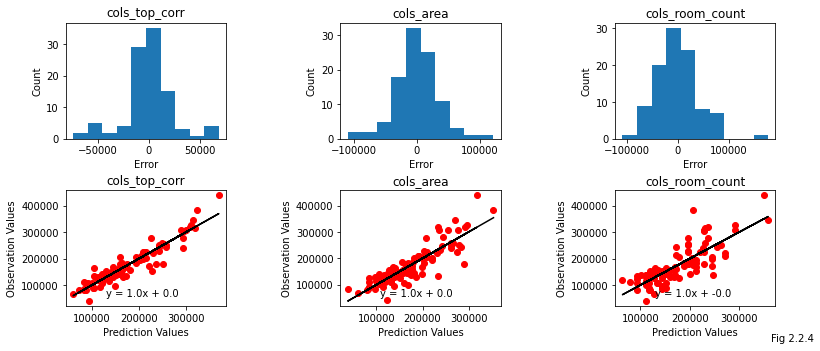

In [27]:
# Initialize figure with subplots
fig, axs = plt.subplots(2, 3)
fig.tight_layout(pad = 2)
fig.set_figheight(5)
fig.set_figwidth(12)

# Initialize figure location markers
x_count = 0
y_count = 0

# For each feature set, create a linear regression model, find its R^2 value
#   and plot both an error distribution histogram and a fit correlation scatterplot
for feature_set in feature_dict.items():
    # Retrieve data for the current feature set
    x = feature_set[1]
    y = y_train
    # Initialize linear regression model
    lr = linear_model.LinearRegression()
    # Fit data onto model
    model = lr.fit(x,y)
    # Generate predictions on model
    predictions = model.predict(x)
    # Find R^2 score for model
    print(f'R^2 for {feature_set[0]} is: {model.score(x,y)}')
    # Generate error distribution
    axs[x_count, y_count].hist(y - predictions)
    axs[x_count, y_count].set_title(feature_set[0])
    axs[x_count, y_count].set_xlabel("Error")
    axs[x_count, y_count].set_ylabel("Count")
    # Navigate to lower axis
    x_count += 1
    # Find regression line equation using scipy.stats
    (slope, intercept, rvalue, pvalue, stderr) = linregress(predictions, y)
    line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
    regress_values = predictions * slope + intercept
    # Generate correlation scatterplot
    axs[x_count, y_count].scatter(predictions, y, color = "r")
    axs[x_count, y_count].set_title(feature_set[0])
    axs[x_count, y_count].set_xlabel("Prediction Values")
    axs[x_count, y_count].set_ylabel("Observation Values")
    # Plot regression line
    axs[x_count, y_count].plot(predictions,regress_values,"black")
    # Display regression line equation
    axs[x_count, y_count].annotate(
        line_eq,(40, 10),
        xycoords= "axes pixels",
        fontsize=10,
        color="black"
        )
    # Set up figure navigation for next feature set
    y_count += 1
    x_count = 0
plt.figtext(.93,.03,"Fig 2.2.4")
plt.show()

[Back to top](#Index)

### 3.3 Results

Observing the $R^2$ for each feature set, the feature set of top correlation coefficients(`top_corr_set`) had the highest $R^2$ of 0.88. The set of square foot area measures(`area_set`) produced an $R^2$ of 0.76, and the set of room counts(`room_count_set`) produced a value of 0.64.

Considering the $R^2$ values, the model of top correlated features seems to be a reliable model, and the most reliable out of the three sets. This can be observed also through its error histogram and correlation scatter plot in `figure 2.2.4`, above. The shape of the error histogram distribution for `top_corr_set` is relatively narrow compared to the other two models. For its scatter plot, a lower amount of spread of the data points can be observed around the regression line, especially when compared to the `room_count_set` feature set.

These observations support the initial hypothesis that finding features best correlated with `SalePrice` leads to an accurate prediction model.

[Back to top](#Index)

### 3.4 Verify Model Against Test Data

With the feature set of top correlation coefficients observed to be the best fit for the model, the model was then verified against test data that was not included in the training data the model was fit on.

After cleaning and reshaping the data to match that of the training data, the model fit on the training data was compared to the new test data, observing its $R^2$, error histogram and correlation scatter plot again.

In [28]:
# Load test data and review shape
test = pd.read_csv("jtest.csv")
test.shape
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500


In [29]:
# Clean and reshape test data to fit trained data
test_cleaned = test.interpolate()
test_data_one_hot = pd.get_dummies(data=test_cleaned, columns=not_num_cols)
# Get the same columns of the train data for the test data
x_test = test_data_one_hot[top_corr_set["cols_top_corr"]]
y_test = test_data_one_hot["SalePrice"]

R^2 is: 0.774


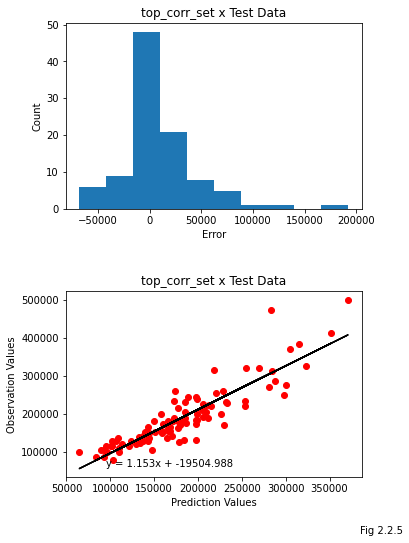

In [30]:
# Recreate the model with the chosen feature set
x_train = feature_dict["cols_top_corr"]
y_train = train_data_one_hot["SalePrice"]

lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)

#Find R^2 against test values
print(f'R^2 is: {round(model.score(x_test, y_test), 3)}')

# Predict values against test values
predictions = model.predict(x_test)

# Plot error histogram and correlation scatter
fig, axs = plt.subplots(2, 1)
fig.tight_layout(pad = 2)
fig.set_figheight(8)
fig.set_figwidth(5)

axs[0].hist(y_test - predictions)
axs[0].set_title("top_corr_set x Test Data")
axs[0].set_xlabel("Error")
axs[0].set_ylabel("Count")

# Find regression line equation using scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(predictions, y_test)
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
regress_values = predictions * slope + intercept
axs[1].scatter(predictions, y_test, color = "r")
axs[1].set_title("top_corr_set x Test Data")
axs[1].set_xlabel("Prediction Values")
axs[1].set_ylabel("Observation Values")

# Plot regression line
axs[1].plot(predictions,regress_values,"black")
# Display regression line equation
axs[1].annotate(
    line_eq,(40, 10),
    xycoords= "axes pixels",
    fontsize=10,
    color="black"
    )

plt.figtext(.93,.03,"Fig 2.2.5")
plt.show()


Testing the model built by the training data set and `top_corr` feature set against the test data yielded an $R^2$ of 0.77. A drop in this value from that of testing against the trained data set is expected, and is still a relatively high $R^2$ value for testing on data unfamiliar to the model.

This can again be seen in the error histogram and correlation scatter plot. Although some outliers can be observed in the error histogram, a narrow distribution around the mean 0 is still present, implying a reliable model. The scatter plot seems to demonstrate that the fit is relatively weaker when testing against the test data compared to the trained data, implied by a larger scattering of data points in the upper right quadrant of the plot. Nonetheless, a strong cohesion around the line can still be seen in the lower left of the graph, also implying a strong model fit.

[Back to top](#Index)

## Conclusion

Observing the $R^2$ of all the models produced within this analysis and that of the curriculum, the approach in this study focusing on cleaning and data preparation appears to have contributed to a more reliable model. The highest $R^2$ within this analysis on the train data was 0.88 which is higher than the one produced in the curriculum material using only five features at 0.831. Testing against the test data from jtest.csv yielded similar results, with the value $R^2$ with the best fitting model from this study at 0.77, while the $R^2$ produced within the curriculum material was 0.74.

One factor that may have contributed to this was the inclusion of 5 more features than the curriculum example(10 features total for this study). The regression model generated in this study accounts for more factors with strong correlation to the sales price, producing a more accurate model. Another factor that may have contributed was the consideration of categorical features, as one feature was included within the feature set of strongest correlations, `BsmtQual_: _Ex`, with a correlation coefficient of 0.68.

Going through this analysis, I learned that most of the process is spent cleaning the data. Careful consideration must be taken for the context of each feature to know how to interpret null or 0 values. Because there is no simple way to programmatically determine the role of some data against its context, reviews of the feature must be done manually, possibly requiring discussion with a subject matter expert on individual features. Additionally, I found this step important because one feature, `MSSubClass` which describes the type of building the house is, was misrepresented as a numerical feature. It uses number values as a designator for a category (e.g. "30" represents the category "1-STORY 1945 & OLDER" ). A conversion of this feature's data type was necessary to accurately represent its correlation to the sale price.

To echo the results observed when comparing observations against the class material, I learned that the consideration of categorical features is important as well, as one was included in the top correlated features. Ignoring these features may result in the loss of an important feature that strongly impacts the dependent variable, resulting in a weaker model. In addition to this, considering a higher number of highly correlated features seems to strengthen the model as well.

In summary, detailed considerations and knowledge of the data context during the data cleaning phase were found to be crucial for retaining accurate representation of the data, as well as considering all features that have valid data available(both numerical and categorical) as potential candidates for a prediction model.


[Back to top](#Index)
## References

- Frost, Jim. "Mean Squared Error (MSE)." Statistics By Jim. 2022. https://statisticsbyjim.com/regression/mean-squared-error-mse/ .

- Frost, Jim. "How To Interpret R-squared in Regression Analysis." Statistics By Jim. 2022. https://statisticsbyjim.com/regression/interpret-r-squared-regression/ .

- Glen, Stephanie. "Linear Regression: Simple Steps, Video. Find Equation, Coefficient, Slope." StatisticsHowTo.com: Elementary Statistics for the rest of us!. 2022. https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/ .

- Yang, Archer Yi. "An Example R Markdown." www.math.mcgill.ca. McGill University, 2017. https://www.math.mcgill.ca/yyang/regression/RMarkdown/example.html .

- Ford, Clay. "Interpreting Log Transformations in a Linear Model." Research Data Services + Sciences. University of Virginia Library, 2018. https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/ .

- illust image. DESIGNALIKIE, 2022. https://illustimage.com/ .